In [1316]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [1317]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


In [1318]:
file = tf.keras.utils
# raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
# raw_df.head()

exported_path = 'tensorflow_group_datasets/one_res_small/no_leaks_rand_base_demand/'
dataset_path = exported_path

out_filename = '1M_one_res_small_leaks_ordered_group_0_node_0_0164_merged.csv'
raw_df1 = pd.read_csv(dataset_path+out_filename, delimiter=";")

exported_path = 'tensorflow_group_datasets/one_res_small/1_at_82_leaks_rand_base_demand/'
dataset_path = exported_path
# leak_node = 3

"""
modelli trovati

leak_group = 2
leak_node = x

leak_group = 3
leak_node = 5

leak_group = 4
leak_node = 2

leak_group = 5
leak_node = non trovato


"""



leak_area = "0164" # "0246" #"0164"
leak_group = 3
leak_node = 5
out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
raw_df2 = pd.read_csv(dataset_path+out_filename, delimiter=";")

# leak_node = 5
# leak_group = 2
# out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
# raw_df3 = pd.read_csv(dataset_path+out_filename, delimiter=";")
#
# leak_group = 3
# out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
# raw_df4 = pd.read_csv(dataset_path+out_filename, delimiter=";")
#
# leak_group = 4
# out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
# raw_df5 = pd.read_csv(dataset_path+out_filename, delimiter=";")
#
# leak_group = 5
# out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
# raw_df6 = pd.read_csv(dataset_path+out_filename, delimiter=";")
#
# leak_group = 6
# out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
# raw_df7 = pd.read_csv(dataset_path+out_filename, delimiter=";")
#
# leak_group = 7
# out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
# raw_df8 = pd.read_csv(dataset_path+out_filename, delimiter=";")

# Appending multiple DataFrame
raw_df = pd.concat([raw_df1, raw_df2])#raw_df4, raw_df5, raw_df6, raw_df7, raw_df8])
# options = ["8626", "8628", "8630", "8644", "8634", "8632", "8636", "8646", "8688", "8640"]
# raw_df = raw_df.loc[raw_df['nodeID'].isin(options)]

raw_df.reset_index(drop=True, inplace=True)
# raw_df.head()


leak_area = "0164" # "0246" #"0164"
leak_group = 1
leak_node = 5
out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group)+"_node_"+str(leak_node)+"_"+leak_area+"_merged.csv"
raw_df_test = pd.read_csv(dataset_path+out_filename, delimiter=";")







In [1319]:
# columns = ["Index(['hour;nodeID;base_demand;demand_value;head_value;pressure_value;x_pos;y_pos;node_type;has_leak;leak_area_value;leak_discharge_value;leak_demand_value;flow_demand_in;demand_0;head_0;pressure_0;demand_1;head_1;pressure_1;demand_2;head_2;pressure_2;demand_3;head_3;pressure_3;demand_4;head_4;pressure_4;demand_5;head_5;pressure_5;demand_6;head_6;pressure_6;demand_7;head_7;pressure_7;demand_8;head_8;pressure_8;demand_9;head_9;pressure_9;flow_demand_out;leak_group'], dtype='object')"]

# column = ["flow_demand_in", "demand_0", "head_0", "pressure_0", "demand_1", "head_1", "pressure_1"]
# column = ['nodeID']
# ;demand_2;head_2;pressure_2;demand_3;head_3;pressure_3;demand_4;head_4;pressure_4;demand_5;head_5;pressure_5;demand_6;head_6;pressure_6;demand_7;head_7;pressure_7;demand_8;head_8;pressure_8;demand_9;head_9;pressure_9;flow_demand_out;leak_group'], dtype='object')"]

# print(raw_df.columns)
# raw_df.describe()


In [1320]:
cleaned_df = raw_df.copy()
cleaned_df_test = raw_df_test.copy()


# You don't want the `Time` column.
# cleaned_df.pop('Time')

#hour', 'nodeID', 'base_demand', 'demand_value', 'head_value',
       # 'pressure_value', 'x_pos', 'y_pos', 'node_type', 'has_leak',
       # 'leak_area_value', 'leak_discharge_value', 'leak_demand_value',
       # 'flow_demand_in', 'demand_0', 'head_0', 'pressure_0', 'demand_1',
       # 'head_1', 'pressure_1', 'demand_2', 'head_2', 'pressure_2', 'demand_3',
       # 'head_3', 'pressure_3', 'demand_4', 'head_4', 'pressure_4', 'demand_5',
       # 'head_5', 'pressure_5', 'demand_6', 'head_6', 'pressure_6', 'demand_7',
       # 'head_7', 'pressure_7', 'demand_8', 'head_8', 'pressure_8', 'demand_9',
       # 'head_9', 'pressure_9', 'flow_demand_out', 'leak_group'


pop_col = ['hour', 'nodeID', 'node_type',
           'leak_area_value', 'leak_discharge_value', 'leak_demand_value',
           # 'leak_group',
           'has_leak'
           ]

cleaned_df = cleaned_df.drop(pop_col, axis=1)
cleaned_df_test = cleaned_df_test.drop(pop_col, axis=1)

cleaned_df.rename(columns = {'leak_group':'Class'}, inplace = True)
# cleaned_df.rename(columns = {'has_leak':'Class'}, inplace = True)


cleaned_df_test.rename(columns = {'leak_group':'Class'}, inplace = True)
# cleaned_df_test.rename(columns = {'has_leak':'Class'}, inplace = True)



In [1321]:
neg, pos = np.bincount(cleaned_df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))


Examples:
    Total: 107520
    Positive: 6720 (6.25% of total)



In [1322]:

# The `Amount` column covers a huge range. Convert to log-space.
# eps = 0.001 # 0 => 0.1¢
# cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)


In [1323]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)



test2_labels = np.array(cleaned_df_test.pop('Class'))
test2_features = np.array(cleaned_df_test)





In [1324]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test2_features = scaler.transform(test2_features)
test_features = scaler.transform(test_features)

# train_features = np.clip(train_features, -5, 5)
# val_features = np.clip(val_features, -5, 5)
# test2_features = np.clip(test2_features, -5, 5)
# test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('test 2 labels shape:', test2_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('test 2 features shape:', test2_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (68812,)
Validation labels shape: (17204,)
test 2 labels shape: (53760,)
Test labels shape: (21504,)
Training features shape: (68812, 38)
Validation features shape: (17204, 38)
test 2 features shape: (53760, 38)
Test features shape: (21504, 38)


In [1325]:
# sns.pairplot(cleaned_df.loc[0:200])

# plt.figure(figsize = (12,8))
# cmap = sns.diverging_palette(230,20,as_cmap=True)
# sns.heatmap(cleaned_df.loc[0:200].corr(),annot=True,fmt='.2f',cmap=cmap)
# plt.show()

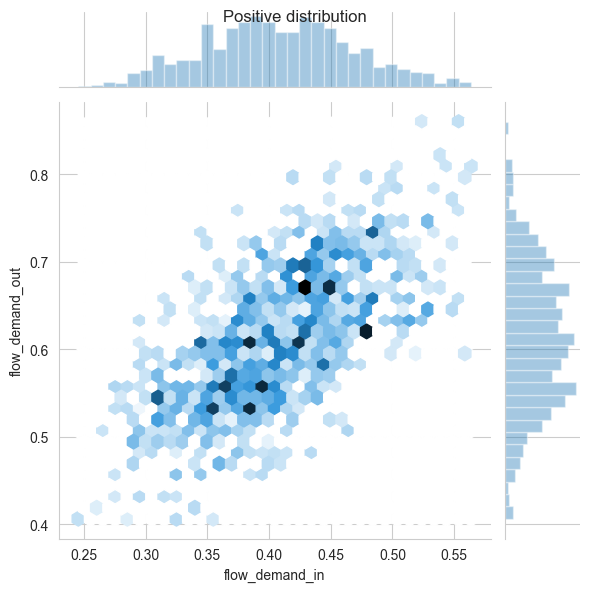

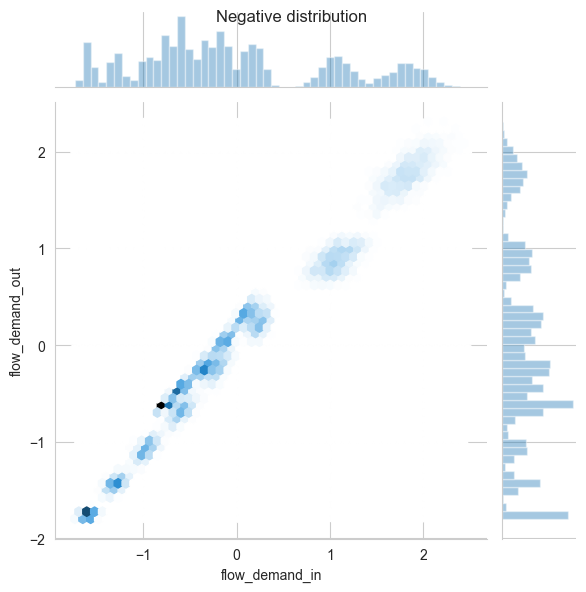

In [1326]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

# sns.jointplot(x=pos_df['flow_demand_in'], y=pos_df['flow_demand_out'],
#               kind='hex', xlim=(-0,1), ylim=(-0,1))
# plt.suptitle("Positive distribution")
#
# sns.jointplot(x=neg_df['flow_demand_in'], y=neg_df['flow_demand_out'],
#               kind='hex', xlim=(-3,3), ylim=(-3,3))

sns.jointplot(x=pos_df['flow_demand_in'], y=pos_df['flow_demand_out'],
              kind='hex')
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['flow_demand_in'], y=neg_df['flow_demand_out'],
              kind='hex')

_ = plt.suptitle("Negative distribution")


In [1327]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [1328]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc',
    verbose=1,
    patience=30,
    mode='max',
    restore_best_weights=True)


In [1329]:
model = make_model()
model.summary()


Model: "sequential_169"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_338 (Dense)           (None, 16)                624       
                                                                 
 dropout_169 (Dropout)       (None, 16)                0         
                                                                 
 dense_339 (Dense)           (None, 1)                 17        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [1330]:
model.predict(train_features[:10])


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 146ms/step


array([[0.24692625],
       [0.10816249],
       [0.1915495 ],
       [0.38270804],
       [0.19229323],
       [0.11983206],
       [0.20809568],
       [0.57589597],
       [0.25233832],
       [0.24145396]], dtype=float32)

In [1331]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Loss: 0.3696


In [1332]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.7080502])

In [1333]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 65ms/step


array([[0.05959937],
       [0.05949527],
       [0.0559832 ],
       [0.00294313],
       [0.03660404],
       [0.04569843],
       [0.09560427],
       [0.04448557],
       [0.04490659],
       [0.01073675]], dtype=float32)

In [1334]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Loss: 0.2308


In [1335]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)


In [1336]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [1337]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels),
    verbose=0)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [1338]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()


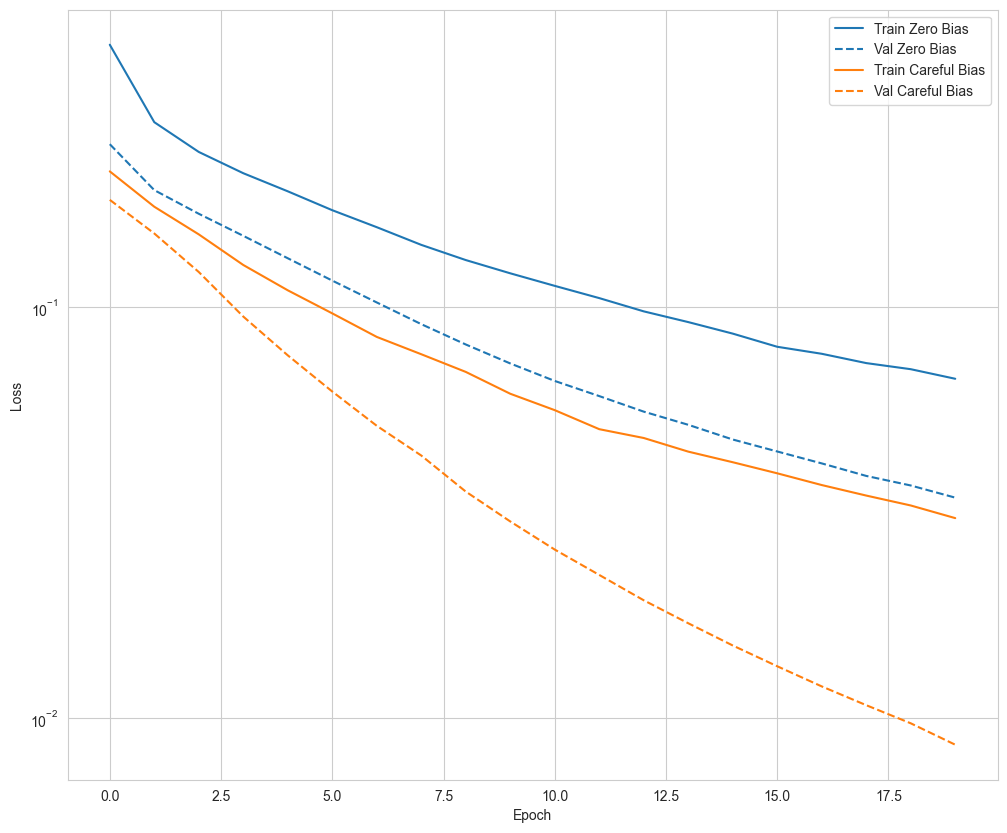

In [1339]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)


In [1340]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))


Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
25/34 [=====================>........] - ETA: 0s - loss: 0.2158 - tp: 1110.0000 - fp: 6.0000 - tn: 64112.0000 - fn: 3176.0000 - accuracy: 0.9535 - precision: 0.9946 - recall: 0.2590 - auc: 0.8316 - prc: 0.4346WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002413E9D9A60> and will run it as-is.
Plea

In [1341]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1.1])
    else:
      plt.ylim([0,1.1])

    plt.legend();


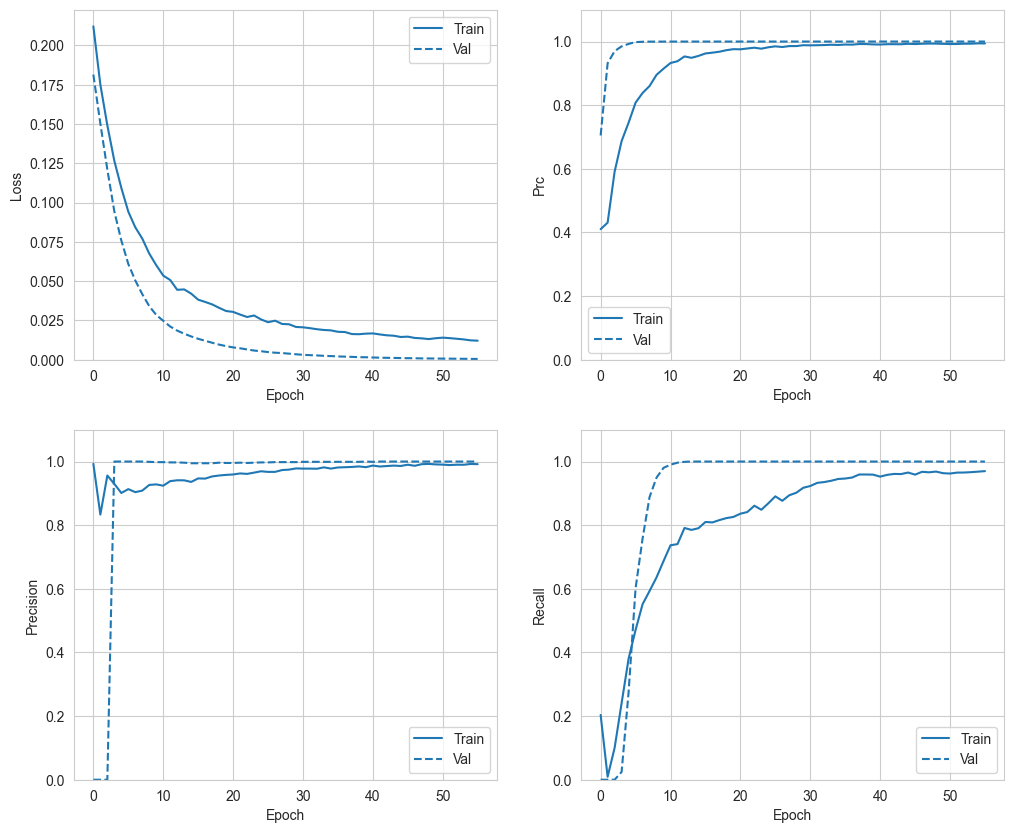

In [1342]:
plot_metrics(baseline_history)


In [1343]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)

test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11/11 [==============================] - 0s 2ms/step


In [1344]:
def plot_cm(labels, predictions, title, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  # plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.title(title)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))


loss :  0.004391963593661785
tp :  1267.0
fp :  6.0
tn :  20231.0
fn :  0.0
accuracy :  0.9997209906578064
precision :  0.9952867031097412
recall :  1.0
auc :  0.9999998211860657
prc :  0.9999978542327881

Legitimate Transactions Detected (True Negatives):  20231
Legitimate Transactions Incorrectly Detected (False Positives):  6
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  1267
Total Fraudulent Transactions:  1267


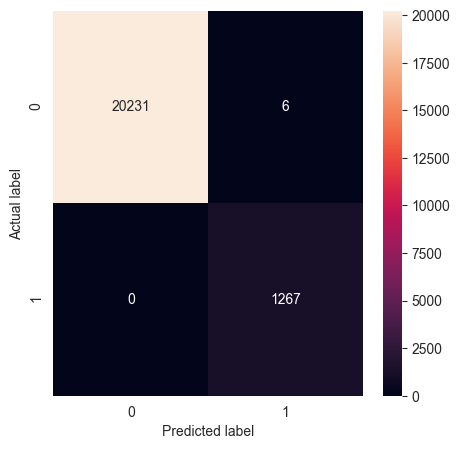

In [1345]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline, '')


27/27 [==============================] - 0s 2ms/step
loss :  3.3493494987487793
tp :  0.0
fp :  10995.0
tn :  36045.0
fn :  6720.0
accuracy :  0.6704798936843872
precision :  0.0
recall :  0.0
auc :  0.21424320340156555
prc :  0.07671023905277252

Legitimate Transactions Detected (True Negatives):  36045
Legitimate Transactions Incorrectly Detected (False Positives):  10995
Fraudulent Transactions Missed (False Negatives):  6720
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  6720


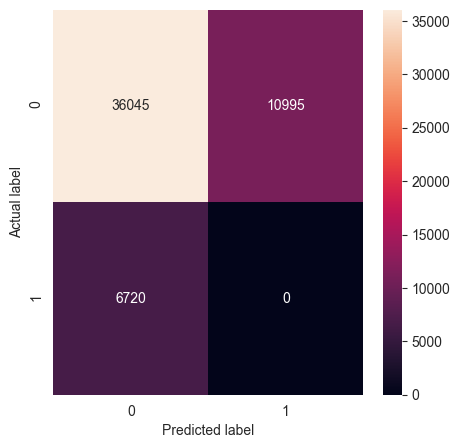

In [1346]:
test2_predictions_baseline = model.predict(test2_features, batch_size=BATCH_SIZE)

baseline_results = model.evaluate(test2_features, test2_labels, batch_size=BATCH_SIZE, verbose=0)

for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test2_labels, test2_predictions_baseline, '')

In [1347]:
# def plot_roc(name, labels, predictions, **kwargs):
#   fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
#
#   plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
#   plt.xlabel('False positives [%]')
#   plt.ylabel('True positives [%]')
#   plt.xlim([-0.5,20])
#   plt.ylim([80,100.5])
#   plt.grid(True)
#   ax = plt.gca()
#   ax.set_aspect('equal')


In [1348]:
# plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
# plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
# plt.legend(loc='lower right');


1M_one_res_small_leaks_ordered_group_3_node_1_0164_merged.csv
27/27 [==============================] - 0s 2ms/step
Legitimate Transactions Detected (True Negatives):  47040
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  978
Fraudulent Transactions Detected (True Positives):  5742
Total Fraudulent Transactions:  6720
1M_one_res_small_leaks_ordered_group_3_node_2_0164_merged.csv
27/27 [==============================] - 0s 2ms/step
Legitimate Transactions Detected (True Negatives):  47040
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  6
Fraudulent Transactions Detected (True Positives):  6714
Total Fraudulent Transactions:  6720
1M_one_res_small_leaks_ordered_group_3_node_3_0164_merged.csv
27/27 [==============================] - 0s 3ms/step
Legitimate Transactions Detected (True Negatives):  47040
Legitimate Transactions Incorrectly Detected (False

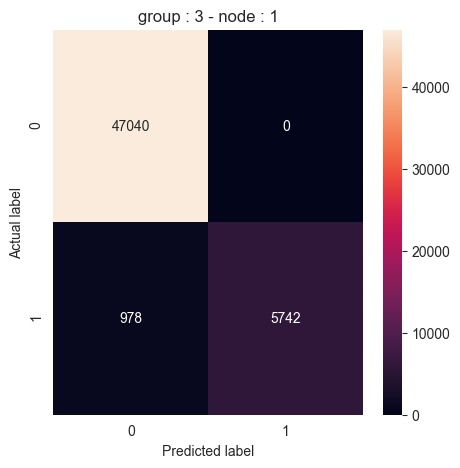

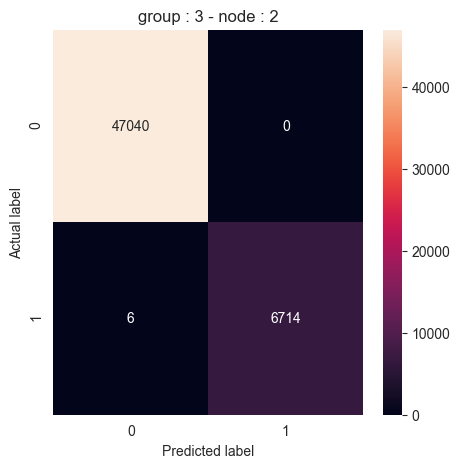

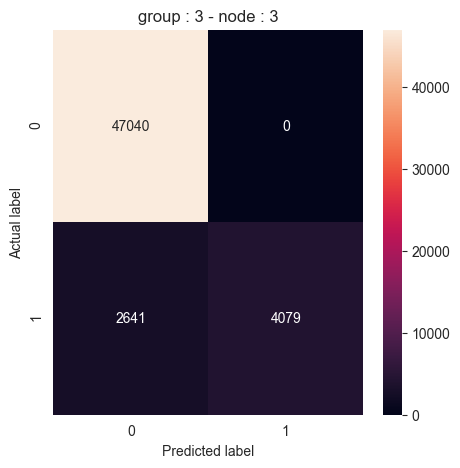

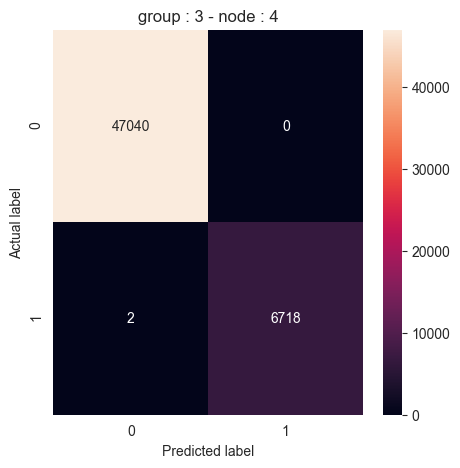

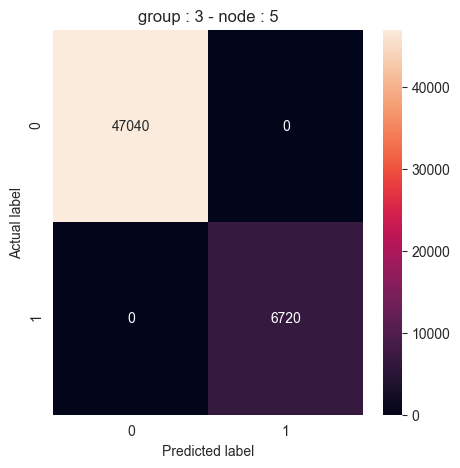

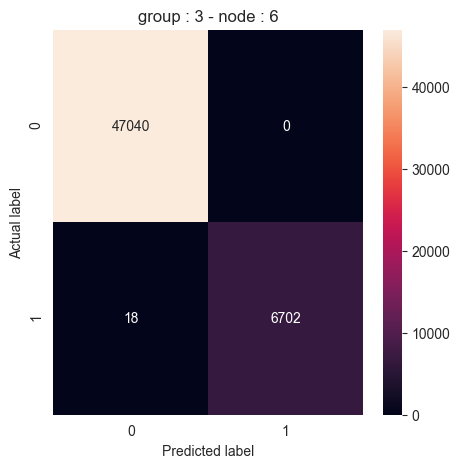

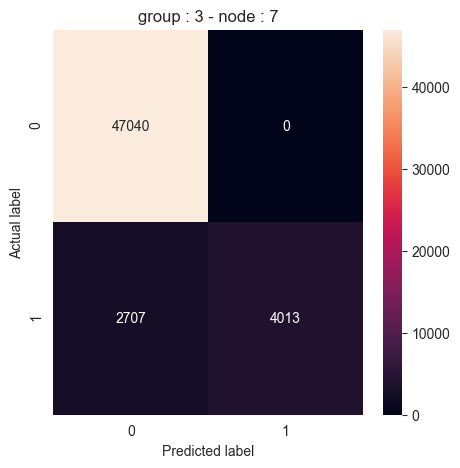

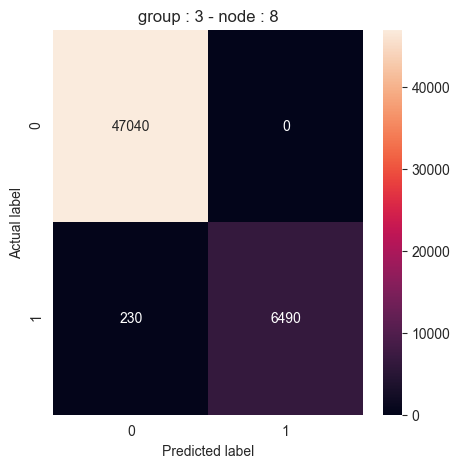

In [1355]:
leak_area_final_test = "0164" # "0246" #"0164"

for final_test_index in range(3,4,1):
    leak_group_final_test = final_test_index #3
    for final_test_index in range(1,9,1):

        leak_node_final_test = final_test_index
        out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group_final_test)+"_node_"+str(leak_node_final_test)+"_"+leak_area_final_test+"_merged.csv"
        print(out_filename)
        raw_df_test_2 = pd.read_csv(dataset_path+out_filename, delimiter=";")

        cleaned_df_test_2 = raw_df_test_2.copy()
        cleaned_df_test_2 = cleaned_df_test_2.drop(pop_col, axis=1)
        cleaned_df_test_2.rename(columns = {'leak_group':'Class'}, inplace = True)
        # cleaned_df_validation.rename(columns = {'has_leak':'Class'}, inplace = True)

        test2_labels_2 = np.array(cleaned_df_test_2.pop('Class'))
        test2_features_2 = np.array(cleaned_df_test_2)

        test2_features_2 = scaler.transform(test2_features_2)
        test2_predictions_baseline = model.predict(test2_features_2, batch_size=BATCH_SIZE)

        # baseline_results = model.evaluate(test2_features_2, test2_labels_2, batch_size=BATCH_SIZE, verbose=0)
        # for name, value in zip(model.metrics_names, baseline_results):
        #   print(name, ': ', value)
        # print()

        title = "group : "+ str(leak_group_final_test) + " - node : " + str(leak_node_final_test)
        plot_cm(test2_labels_2, test2_predictions_baseline, title)


# leak_area_final_test = "0164" # "0246" #"0164"
#
# exported_path = 'tensorflow_group_datasets/one_res_small/1_at_82_leaks_rand_base_demand/'
# dataset_path = exported_path
# # leak_node = 3
#
#
# raw_df_test_2_all = None
# # for final_test_group_index in range(5,6,1):
# if True:
#     leak_group_final_test = 3#final_test_group_index #3
#
#     for final_test_index in range(1,10,1):
#         leak_node_final_test = final_test_index
#
#         out_filename = "1M_one_res_small_leaks_ordered_group_"+str(leak_group_final_test)+"_node_"+str(leak_node_final_test)+"_"+leak_area_final_test+"_merged.csv"
#         print(out_filename)
#         raw_df_test_2 = pd.read_csv(dataset_path+out_filename, delimiter=";")
#
#         # Appending multiple DataFrame
#         raw_df_test_2_all = pd.concat([raw_df_test_2_all, raw_df_test_2])
#         raw_df_test_2_all.reset_index(drop=True, inplace=True)
#
#
#
# # options = ["8626", "8628", "8630", "8644", "8634", "8632", "8636", "8646", "8688", "8640"]
# # raw_df_test_2_all = raw_df_test_2_all.loc[raw_df_test_2_all['nodeID'].isin(options)]
#
#
#
# cleaned_df_test_2 = raw_df_test_2_all.copy()
# cleaned_df_test_2 = cleaned_df_test_2.drop(pop_col, axis=1)
# cleaned_df_test_2.rename(columns = {'leak_group':'Class'}, inplace = True)
# # cleaned_df_test_2.rename(columns = {'has_leak':'Class'}, inplace = True)
#
# test2_labels_2 = np.array(cleaned_df_test_2.pop('Class'))
# test2_features_2 = np.array(cleaned_df_test_2)
#
# test2_features_2 = scaler.transform(test2_features_2)
# test2_predictions_baseline = model.predict(test2_features_2, batch_size=BATCH_SIZE)
#
# baseline_results = model.evaluate(test2_features_2, test2_labels_2, batch_size=BATCH_SIZE, verbose=0)
# for name, value in zip(model.metrics_names, baseline_results):
#   print(name, ': ', value)
# print()
#
# title = "group : "+ str(leak_group_final_test) #+ " - node : " + str(leak_node_final_test)
# plot_cm(test2_labels_2, test2_predictions_baseline, title)


In [1350]:
# print(test2_features_2[0])
# print(test2_labels_2[0])

In [1351]:
# print(test2_features_2[0:1])
# print(test2_labels_2[0:1])
# print(model.predict(test2_features_2[0:1], batch_size=BATCH_SIZE))


In [1352]:
# model.save('tensorflow_group_datasets/model/first')


In [1353]:
# model.save('tensorflow_group_datasets/model/first_h5/model_first.h5')


In [1354]:
# # Recreate the exact same model, including its weights and the optimizer
# loaded_model = tf.keras.models.load_model('tensorflow_group_datasets/model/first_h5/model_first.h5')
#
# # Show the model architecture
# loaded_model.summary()
#
# print(test2_features_2[0:1])
# print(test2_labels_2[0:1])
# print(loaded_model.predict(test2_features_2[0:1], batch_size=BATCH_SIZE))
